## 데이터 불러오기

### 기본적인 data 로드

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime
import seaborn as sns

In [2]:
df_click = pd.read_csv('csv/click_stream.csv')
df_click_new = pd.read_csv('csv/click_stream_new.csv')
df_customer = pd.read_csv('csv/customer.csv')
df_product = pd.read_csv('csv/product.csv', on_bad_lines='skip')
df_trans = pd.read_csv('csv/transactions.csv')
df_trans_new = pd.read_csv('csv/transaction_new.csv')

### click_stream

In [3]:
print(df_click.info(), df_click.shape)
print(df_click_new.info(), df_click_new.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12833602 entries, 0 to 12833601
Data columns (total 6 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   session_id      object
 1   event_name      object
 2   event_time      object
 3   event_id        object
 4   traffic_source  object
 5   event_metadata  object
dtypes: object(6)
memory usage: 587.5+ MB
None (12833602, 6)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12833602 entries, 0 to 12833601
Data columns (total 12 columns):
 #   Column           Dtype  
---  ------           -----  
 0   session_id       object 
 1   event_name       object 
 2   event_time       object 
 3   event_id         object 
 4   traffic_source   object 
 5   product_id       float64
 6   quantity         float64
 7   item_price       float64
 8   payment_status   object 
 9   search_keywords  object 
 10  promo_code       object 
 11  promo_amount     float64
dtypes: float64(4), object(8)
memory usage: 1.1+ GB
None (12833602

In [4]:
# 칼럼의 갯수가 두배인 것을 확인 -> 어떤 항목인지 체크
display(df_click.head(5), df_click_new.head(5))

,session_id,event_name,event_time,event_id,traffic_source,event_metadata
0,fb0abf9e-fd1a-44dd-b5c0-2834d5a4b81c,HOMEPAGE,2019-09-06T15:54:32.821085Z,9c4388c4-c95b-4678-b5ca-e9cbc0734109,MOBILE,NaN
1,fb0abf9e-fd1a-44dd-b5c0-2834d5a4b81c,SCROLL,2019-09-06T16:03:57.821085Z,4690e1f5-3f99-42d3-84a5-22c4c4d8500a,MOBILE,NaN
2,7d440441-e67a-4d36-b324-80ffd636d166,HOMEPAGE,2019-09-01T12:05:10.322763Z,88aeaeb5-ec98-4859-852c-8abb483faf31,MOBILE,NaN
3,7d440441-e67a-4d36-b324-80ffd636d166,ADD_TO_CART,2019-09-01T12:06:33.322763Z,934e306e-ecc6-472f-9ccb-12c8536910a2,MOBILE,"{'product_id': 15315, 'quantity': 4, 'item_pri..."
4,7d440441-e67a-4d36-b324-80ffd636d166,BOOKING,2019-09-01T12:15:29.425431Z,9f4767a1-40fa-4c9c-9524-dfad18634d56,MOBILE,{'payment_status': 'Success'}


,session_id,event_name,event_time,event_id,traffic_source,product_id,quantity,item_price,payment_status,search_keywords,promo_code,promo_amount
0,fb0abf9e-fd1a-44dd-b5c0-2834d5a4b81c,HOMEPAGE,2019-09-06T15:54:32.821085Z,9c4388c4-c95b-4678-b5ca-e9cbc0734109,MOBILE,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,fb0abf9e-fd1a-44dd-b5c0-2834d5a4b81c,SCROLL,2019-09-06T16:03:57.821085Z,4690e1f5-3f99-42d3-84a5-22c4c4d8500a,MOBILE,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,7d440441-e67a-4d36-b324-80ffd636d166,HOMEPAGE,2019-09-01T12:05:10.322763Z,88aeaeb5-ec98-4859-852c-8abb483faf31,MOBILE,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,7d440441-e67a-4d36-b324-80ffd636d166,ADD_TO_CART,2019-09-01T12:06:33.322763Z,934e306e-ecc6-472f-9ccb-12c8536910a2,MOBILE,15315.0,4.0,313529.0,NaN,NaN,NaN,NaN
4,7d440441-e67a-4d36-b324-80ffd636d166,BOOKING,2019-09-01T12:15:29.425431Z,9f4767a1-40fa-4c9c-9524-dfad18634d56,MOBILE,NaN,NaN,NaN,Success,NaN,NaN,NaN


In [5]:
# click_stream_new 데이터의 경우 딕셔너리 형태의
# event_metadata 칼럼이 분할되어 정보가 들어감.

In [6]:
df_click_new.session_id.unique().shape

(895203,)

In [7]:
df_click_new.loc[df_click_new['event_name'] == 'BOOKING', 'session_id']

4           7d440441-e67a-4d36-b324-80ffd636d166
21          f7b5cd60-4f87-4b3c-8bde-c7da8930eec2
40          b2843a94-248f-429e-bd54-1a456b4ef4a7
47          d9aaa8a8-5e60-4e1e-ab0a-bb9755a7a3e9
54          98e66f53-f24f-4238-8c9c-34a0482e22d5
                            ...                 
12833584    f38416ce-51f2-46b0-a476-776d8fed1cb0
12833588    c1ce86f6-858b-4009-af5b-f1483a28d020
12833592    f5c4bbe0-f977-45bb-af23-6ab524df7777
12833596    ad1063b0-a6e5-40a9-aed6-d1b45741e571
12833600    64585e37-3fe7-48d7-b79b-ebcb70230eb2
Name: session_id, Length: 852582, dtype: object

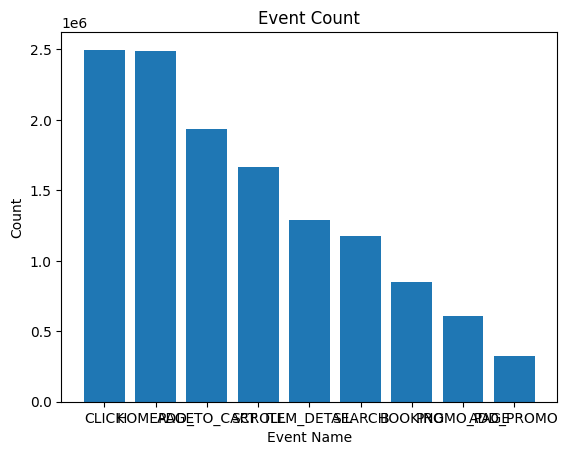

In [8]:
# BOOKING이 있는 session 정리하려했으나 양이 많음.

event_counts = df_click_new['event_name'].value_counts()

plt.title("Event Count")
plt.bar(event_counts.index, event_counts.values)
plt.xlabel('Event Name')
plt.ylabel('Count')
plt.show()

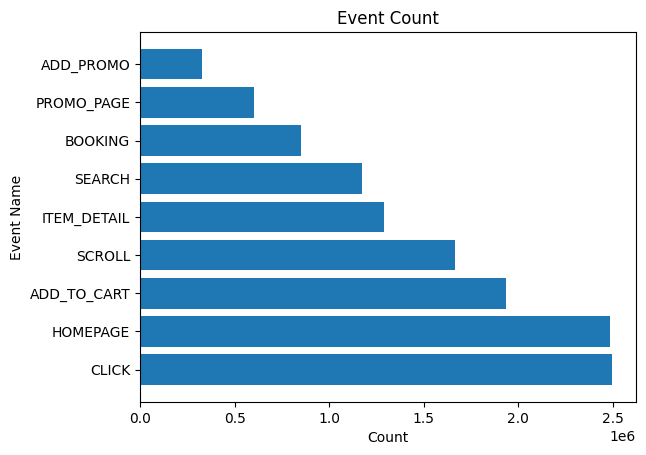

In [9]:
plt.title("Event Count")
plt.barh(event_counts.index, event_counts.values)
plt.xlabel('Count')
plt.ylabel('Event Name')
plt.show()

In [10]:
last_event = df_click_new.groupby('session_id').last()['event_name']

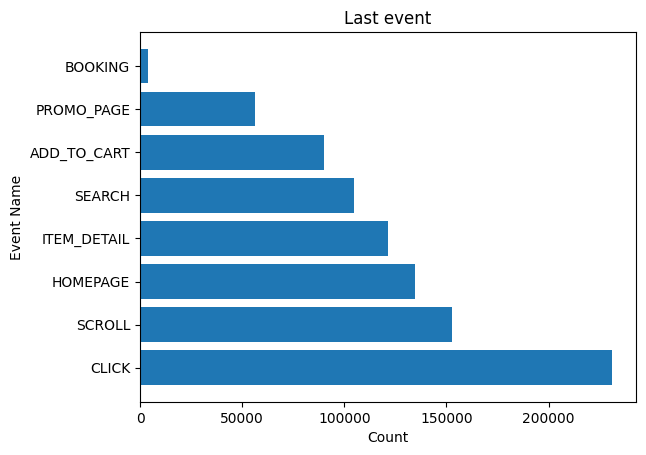

In [11]:
last_counts = last_event.value_counts()
plt.title("Last event")
plt.barh(last_counts.index, last_counts.values)
plt.ylabel('Event Name')
plt.xlabel('Count')
plt.show()

In [12]:
# 데이터가 시간순으로 정렬되어 있지 않은 것 확인.

df_click_new['event_time'] = pd.to_datetime(df_click_new['event_time'])

In [13]:
df_click_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12833602 entries, 0 to 12833601
Data columns (total 12 columns):
 #   Column           Dtype              
---  ------           -----              
 0   session_id       object             
 1   event_name       object             
 2   event_time       datetime64[ns, UTC]
 3   event_id         object             
 4   traffic_source   object             
 5   product_id       float64            
 6   quantity         float64            
 7   item_price       float64            
 8   payment_status   object             
 9   search_keywords  object             
 10  promo_code       object             
 11  promo_amount     float64            
dtypes: datetime64[ns, UTC](1), float64(4), object(7)
memory usage: 1.1+ GB


In [14]:
last_event = df_click_new.groupby('session_id').apply(lambda x: x.sort_values('event_time').iloc[-1])['event_name']

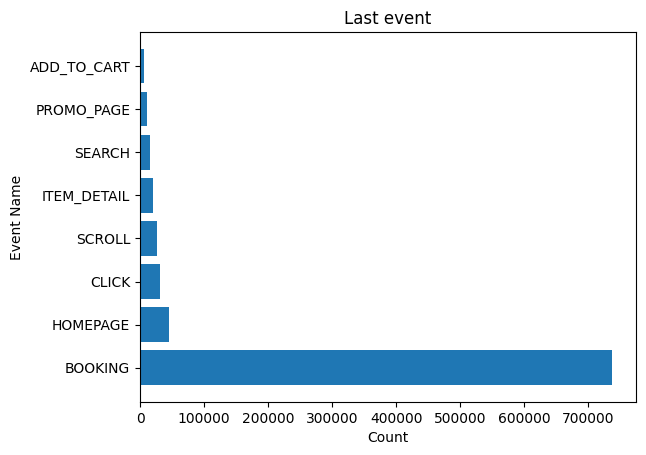

In [15]:
last_counts = last_event.value_counts()
plt.title("Last event")
plt.barh(last_counts.index, last_counts.values)
plt.ylabel('Event Name')
plt.xlabel('Count')
plt.show()

In [16]:
last_event.value_counts()

event_name
BOOKING        737866
HOMEPAGE        45913
CLICK           31311
SCROLL          27102
ITEM_DETAIL     20512
SEARCH          15318
PROMO_PAGE      10581
ADD_TO_CART      6600
Name: count, dtype: int64

In [17]:
737866/895203 * 0.95

0.7830321167377678

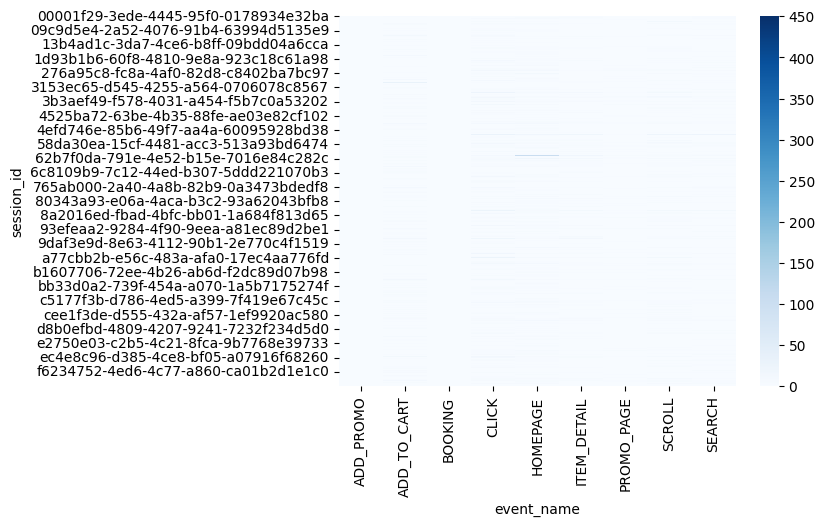

In [18]:
# event_name 칼럼과 다른 칼럼 간의 교차표를 구합니다
cross_tab = pd.crosstab( df_click_new['session_id'], df_click_new['event_name'])

# 히트맵을 그립니다
sns.heatmap(cross_tab, cmap='Blues')
plt.show()

In [19]:
# # 가독성이 매우 좋지 않음.

# df_click_new['session_date'] = df_click_new['event_time'].str[:10]
# # 'session_date' 칼럼과 다른 칼럼 간의 교차표를 구합니다
# cross_tab = pd.crosstab(df_click_new['session_date'], df_click_new['event_name'])

# # 히트맵을 그립니다
# plt.title("Action for Date")
# sns.heatmap(cross_tab, cmap='Blues')
# plt.show()

### customer

In [20]:
print(df_customer.info(), df_customer.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 15 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   customer_id         100000 non-null  int64  
 1   first_name          100000 non-null  object 
 2   last_name           100000 non-null  object 
 3   username            100000 non-null  object 
 4   email               100000 non-null  object 
 5   gender              100000 non-null  object 
 6   birthdate           100000 non-null  object 
 7   device_type         100000 non-null  object 
 8   device_id           100000 non-null  object 
 9   device_version      100000 non-null  object 
 10  home_location_lat   100000 non-null  float64
 11  home_location_long  100000 non-null  float64
 12  home_location       100000 non-null  object 
 13  home_country        100000 non-null  object 
 14  first_join_date     100000 non-null  object 
dtypes: float64(2), int64(1), object(12)

In [21]:
df_customer.head(5)

,customer_id,first_name,last_name,username,email,gender,birthdate,device_type,device_id,device_version,home_location_lat,home_location_long,home_location,home_country,first_join_date
0,2870,Lala,Maryati,671a0865-ac4e-4dc4-9c4f-c286a1176f7e,671a0865_ac4e_4dc4_9c4f_c286a1176f7e@startupca...,F,1996-06-14,iOS,c9c0de76-0a6c-4ac2-843f-65264ab9fe63,iPhone; CPU iPhone OS 14_2_1 like Mac OS X,-1.043345,101.360523,Sumatera Barat,Indonesia,2019-07-21
1,8193,Maimunah,Laksmiwati,83be2ba7-8133-48a4-bbcb-b46a2762473f,83be2ba7_8133_48a4_bbcb_b46a2762473f@zakyfound...,F,1993-08-16,Android,fb331c3d-f42e-40fe-afe2-b4b73a8a6e25,Android 2.2.1,-6.212489,106.818850,Jakarta Raya,Indonesia,2017-07-16
2,7279,Bakiman,Simanjuntak,3250e5a3-1d23-4675-a647-3281879d42be,3250e5a3_1d23_4675_a647_3281879d42be@startupca...,M,1989-01-23,iOS,d13dde0a-6ae1-43c3-83a7-11bbb922730b,iPad; CPU iPad OS 4_2_1 like Mac OS X,-8.631607,116.428436,Nusa Tenggara Barat,Indonesia,2020-08-23
3,88813,Cahyadi,Maheswara,df797edf-b465-4a80-973b-9fbb612260c2,df797edf_b465_4a80_973b_9fbb612260c2@zakyfound...,M,1991-01-05,iOS,f4c18515-c5be-419f-8142-f037be47c9cd,iPad; CPU iPad OS 14_2 like Mac OS X,1.299332,115.774934,Kalimantan Timur,Indonesia,2021-10-03
4,82542,Irnanto,Wijaya,36ab08e1-03de-42a8-9e3b-59528c798824,36ab08e1_03de_42a8_9e3b_59528c798824@startupca...,M,2000-07-15,iOS,e46e4c36-4630-4736-8fcf-663db29ca3b0,iPhone; CPU iPhone OS 10_3_3 like Mac OS X,-2.980807,114.924675,Kalimantan Selatan,Indonesia,2021-04-11


c:\Users\mj985\anaconda3\envs\assign\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 52509 (\N{HANGUL SYLLABLE CONG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\mj985\anaconda3\envs\assign\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 44032 (\N{HANGUL SYLLABLE GA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\mj985\anaconda3\envs\assign\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 51077 (\N{HANGUL SYLLABLE IB}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\mj985\anaconda3\envs\assign\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 50976 (\N{HANGUL SYLLABLE YU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\mj985\anaconda3\envs\assign\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 51200 (\N{HANGUL SYLLABLE JEO}) missing from current font.
  fig.can

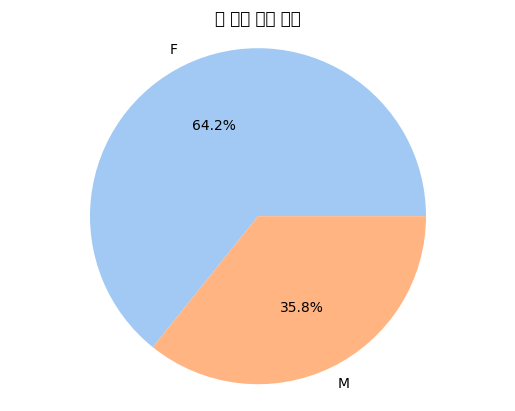

In [22]:
# 성비, 기종비율
gender_counts = df_customer['gender'].value_counts()
device_counts = df_customer['device_type'].value_counts()

colors = sns.color_palette('pastel')

plt.title("총 가입 유저 비율")
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', colors = colors)
plt.axis('equal')
plt.show()

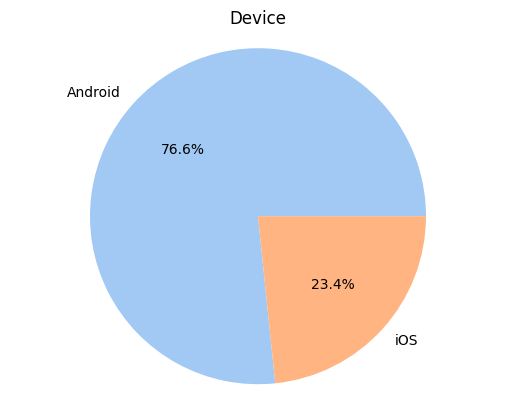

In [23]:
plt.title("Device")
plt.pie(device_counts, labels=device_counts.index, autopct='%1.1f%%', colors = colors)
plt.axis('equal')
plt.show()

In [24]:
# 나이대 별 구하기
# 'birthdate' 칼럼을 datetime 형식으로 변경합니다
df_customer['birthdate'] = pd.to_datetime(df_customer['birthdate'])

# 각 사용자의 나이를 계산합니다
df_customer['year'] = df_customer['birthdate'].dt.year
df_customer['age'] = 2023 - df_customer['year']

# 나이대별로 나누기 위한 구간을 정의합니다
bins = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]

# 'age_group' 칼럼을 추가합니다
df_customer['age_group'] = pd.cut(df_customer['age'], bins=bins, labels=['10대', '20대', '30대', '40대', '50대', '60대', '70대', '80대', '90대'])

In [25]:
age_counts = df_customer['age_group'].value_counts()
age_counts

age_group
20대    52086
30대    26340
10대    16552
40대     4524
50대      380
60대       22
70대        0
80대        0
90대        0
Name: count, dtype: int64

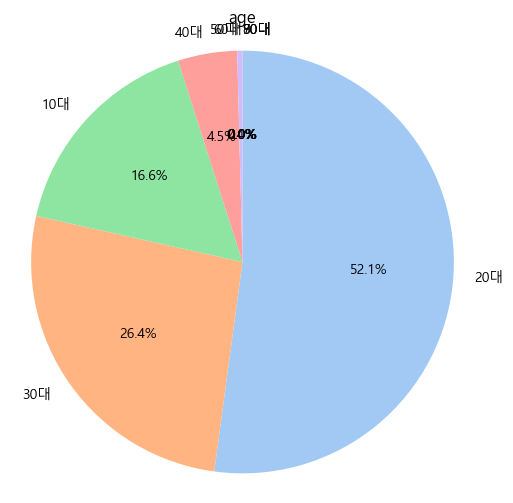

In [26]:

plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False
colors = sns.color_palette('pastel')

fig, ax = plt.subplots(figsize=(6, 6))

plt.title("age")
plt.pie(age_counts, labels=age_counts.index, autopct='%1.1f%%', colors = colors, startangle=90, counterclock=False)
plt.axis('equal')
plt.rcParams.update({'font.size': 8})

plt.show()

### product

In [27]:
print(df_product.info(), df_product.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44424 entries, 0 to 44423
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  44424 non-null  int64  
 1   gender              44424 non-null  object 
 2   masterCategory      44424 non-null  object 
 3   subCategory         44424 non-null  object 
 4   articleType         44424 non-null  object 
 5   baseColour          44409 non-null  object 
 6   season              44403 non-null  object 
 7   year                44423 non-null  float64
 8   usage               44107 non-null  object 
 9   productDisplayName  44417 non-null  object 
dtypes: float64(1), int64(1), object(8)
memory usage: 3.4+ MB
None (44424, 10)


In [28]:
df_product.head(5)

,id,gender,masterCategory,subCategory,articleType,baseColour,season,year,usage,productDisplayName
0,15970,Men,Apparel,Topwear,Shirts,Navy Blue,Fall,2011.0,Casual,Turtle Check Men Navy Blue Shirt
1,39386,Men,Apparel,Bottomwear,Jeans,Blue,Summer,2012.0,Casual,Peter England Men Party Blue Jeans
2,59263,Women,Accessories,Watches,Watches,Silver,Winter,2016.0,Casual,Titan Women Silver Watch
3,21379,Men,Apparel,Bottomwear,Track Pants,Black,Fall,2011.0,Casual,Manchester United Men Solid Black Track Pants
4,53759,Men,Apparel,Topwear,Tshirts,Grey,Summer,2012.0,Casual,Puma Men Grey T-shirt


In [29]:
df_product.rename(columns = {'id': 'product_id'}, inplace = True)

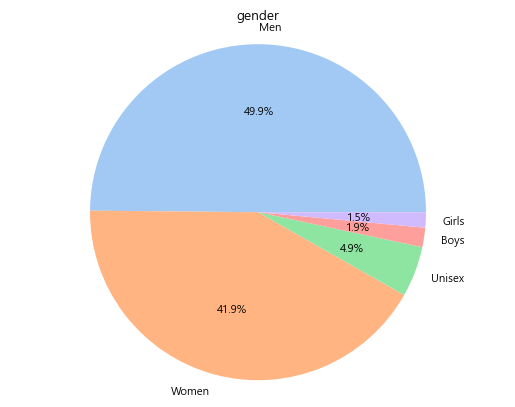

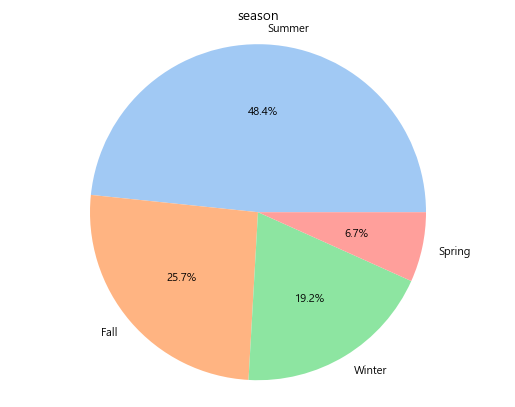

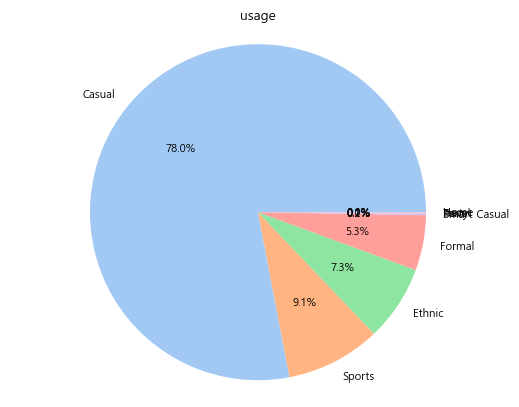

In [30]:
# 비율 시각화가 필요한 칼럼들 시각화
for cols in ['gender', 'season', 'usage']:
    tmp = df_product[cols].value_counts()
    plt.title(cols)
    plt.pie(tmp, labels=tmp.index, autopct='%1.1f%%', colors = colors)
    plt.axis('equal')
    plt.show()

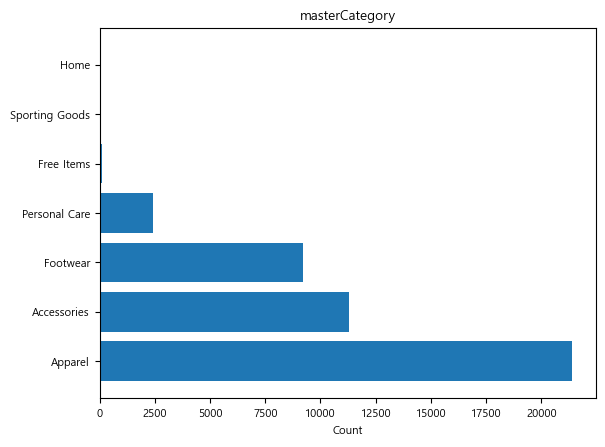

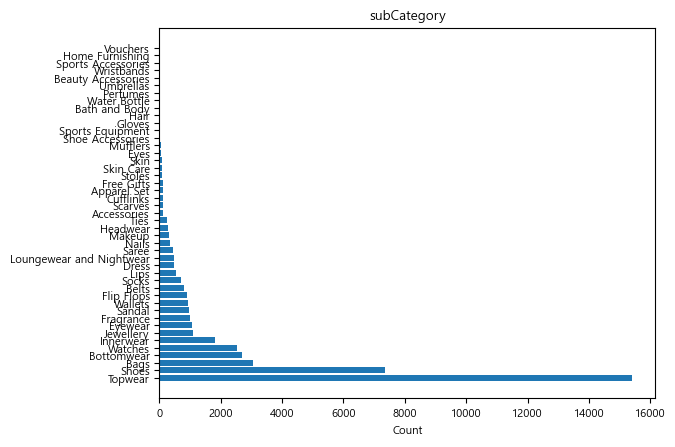

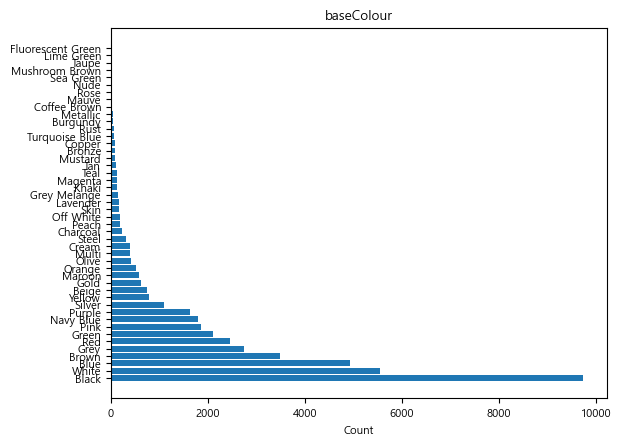

In [31]:
for cols in ['masterCategory', 'subCategory', 'baseColour']:
    tmp = df_product[cols].value_counts()
    plt.title(cols)
    plt.barh(tmp.index, tmp.values)
    plt.xlabel('Count')
    plt.show()

### transaction

In [32]:
print(df_trans.info(), df_trans.shape)
print(df_trans_new.info(), df_trans_new.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 852584 entries, 0 to 852583
Data columns (total 14 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   created_at              852584 non-null  object 
 1   customer_id             852584 non-null  int64  
 2   booking_id              852584 non-null  object 
 3   session_id              852584 non-null  object 
 4   product_metadata        852584 non-null  object 
 5   payment_method          852584 non-null  object 
 6   payment_status          852584 non-null  object 
 7   promo_amount            852584 non-null  int64  
 8   promo_code              326536 non-null  object 
 9   shipment_fee            852584 non-null  int64  
 10  shipment_date_limit     852584 non-null  object 
 11  shipment_location_lat   852584 non-null  float64
 12  shipment_location_long  852584 non-null  float64
 13  total_amount            852584 non-null  int64  
dtypes: float64(2), int64

In [33]:
display(df_trans.head(5), df_trans_new.head(5), df_trans_new.tail(5))

,created_at,customer_id,booking_id,session_id,product_metadata,payment_method,payment_status,promo_amount,promo_code,shipment_fee,shipment_date_limit,shipment_location_lat,shipment_location_long,total_amount
0,2018-07-29T15:22:01.458193Z,5868,186e2bee-0637-4710-8981-50c2d737bc42,3abaa6ce-e320-4e51-9469-d9f3fa328e86,"[{'product_id': 54728, 'quantity': 1, 'item_pr...",Debit Card,Success,1415,WEEKENDSERU,10000,2018-08-03T05:07:24.812676Z,-8.227893,111.969107,199832
1,2018-07-30T12:40:22.365620Z,4774,caadb57b-e808-4f94-9e96-8a7d4c9898db,2ee5ead1-f13e-4759-92df-7ff48475e970,"[{'product_id': 16193, 'quantity': 1, 'item_pr...",Credit Card,Success,0,NaN,10000,2018-08-03T01:29:03.415705Z,3.013470,107.802514,155526
2,2018-09-15T11:51:17.365620Z,4774,6000fffb-9c1a-4f4a-9296-bc8f6b622b50,93325fb6-eb00-4268-bb0e-6471795a0ad0,"[{'product_id': 53686, 'quantity': 4, 'item_pr...",OVO,Success,0,NaN,10000,2018-09-18T08:41:49.422380Z,-2.579428,115.743885,550696
3,2018-11-01T11:23:48.365620Z,4774,f5e530a7-4350-4cd1-a3bc-525b5037bcab,bcad5a61-1b67-448d-8ff4-781d67bc56e4,"[{'product_id': 20228, 'quantity': 1, 'item_pr...",Credit Card,Success,0,NaN,0,2018-11-05T17:42:27.954235Z,-3.602334,120.363824,271012
4,2018-12-18T11:20:30.365620Z,4774,0efc0594-dbbf-4f9a-b0b0-a488cfddf8a2,df1042ab-13e6-4072-b9d2-64a81974c51a,"[{'product_id': 55220, 'quantity': 1, 'item_pr...",Credit Card,Success,0,NaN,0,2018-12-23T17:24:07.361785Z,-3.602334,120.363824,198753


,created_at,customer_id,booking_id,session_id,payment_method,payment_status,promo_amount,promo_code,shipment_fee,shipment_date_limit,shipment_location_lat,shipment_location_long,total_amount,product_id,quantity,item_price
0,2018-07-29T15:22:01.458193Z,5868,186e2bee-0637-4710-8981-50c2d737bc42,3abaa6ce-e320-4e51-9469-d9f3fa328e86,Debit Card,Success,1415,WEEKENDSERU,10000,2018-08-03T05:07:24.812676Z,-8.227893,111.969107,199832,54728,1,191247
1,2018-07-30T12:40:22.365620Z,4774,caadb57b-e808-4f94-9e96-8a7d4c9898db,2ee5ead1-f13e-4759-92df-7ff48475e970,Credit Card,Success,0,NaN,10000,2018-08-03T01:29:03.415705Z,3.013470,107.802514,155526,16193,1,145526
2,2018-09-15T11:51:17.365620Z,4774,6000fffb-9c1a-4f4a-9296-bc8f6b622b50,93325fb6-eb00-4268-bb0e-6471795a0ad0,OVO,Success,0,NaN,10000,2018-09-18T08:41:49.422380Z,-2.579428,115.743885,550696,53686,4,135174
3,2018-11-01T11:23:48.365620Z,4774,f5e530a7-4350-4cd1-a3bc-525b5037bcab,bcad5a61-1b67-448d-8ff4-781d67bc56e4,Credit Card,Success,0,NaN,0,2018-11-05T17:42:27.954235Z,-3.602334,120.363824,271012,20228,1,271012
4,2018-12-18T11:20:30.365620Z,4774,0efc0594-dbbf-4f9a-b0b0-a488cfddf8a2,df1042ab-13e6-4072-b9d2-64a81974c51a,Credit Card,Success,0,NaN,0,2018-12-23T17:24:07.361785Z,-3.602334,120.363824,198753,55220,1,198753


,created_at,customer_id,booking_id,session_id,payment_method,payment_status,promo_amount,promo_code,shipment_fee,shipment_date_limit,shipment_location_lat,shipment_location_long,total_amount,product_id,quantity,item_price
1254580,2021-09-21T22:10:05.074873Z,25121,66f02fa4-c62e-497a-8b6e-be239009b50a,484eecde-9f4a-42de-a8df-7ce6668101f4,Debit Card,Failed,0,NaN,0,2021-09-27T00:43:40.992167Z,-6.869535,111.077145,226820,30642,2,113410
1254581,2021-12-09T07:35:18.222046Z,34829,ccde6b83-ee42-4cce-b2cd-976574886eac,954e1211-4d45-4d0b-ba84-53e80119592c,OVO,Success,5010,AZ2022,10000,2021-12-12T07:52:44.803822Z,-8.677264,115.176947,359203,19394,1,354213
1254582,2021-12-11T01:20:36.944593Z,99645,5bcd3434-1dc6-44bb-ae63-fd19714cbd6c,e6e6c108-abd0-49a2-b0a5-691117f9cfe1,Credit Card,Success,2181,WEEKENDSERU,5000,2021-12-12T13:28:22.848703Z,-6.185498,106.831093,1158159,13079,4,288835
1254583,2019-12-18T11:01:09.623382Z,87319,af7f291a-b01b-4bfd-89a9-237b16368b15,bb6e5426-a3f3-426a-b99d-79173eaa234b,Credit Card,Success,4503,AZ2022,0,2019-12-23T22:56:46.831720Z,-7.155977,110.891858,184143,11312,1,188646
1254584,2019-12-19T12:47:14.701215Z,58180,b242e188-5f94-4448-a038-c5865842374b,5e3183df-198b-40e0-b861-27ef694a832a,Gopay,Success,4724,BUYMORE,10000,2019-12-23T06:02:05.828334Z,-6.155983,106.723535,365963,47433,1,360687


In [34]:
df_trans_new['shipment_fee'].value_counts()

shipment_fee
10000    678371
0        324523
5000      86503
15000     83061
25000     41511
50000     40616
Name: count, dtype: int64

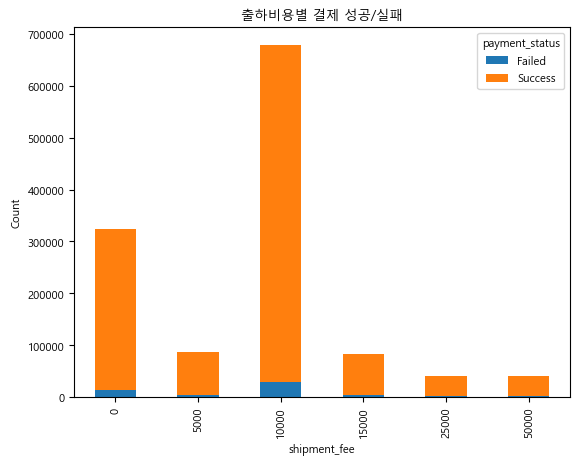

In [35]:
pay_grouped = df_trans_new.groupby(['shipment_fee', 'payment_status']).size().unstack()
ax = pay_grouped.plot(kind='bar', stacked = True)

total = pay_grouped.sum(axis=1)


plt.title('출하비용별 결제 성공/실패')
plt.xlabel('shipment_fee')
plt.ylabel('Count')

plt.show()

In [36]:
result = pay_grouped['Success']/total

result

shipment_fee
0        0.956672
5000     0.955990
10000    0.957786
15000    0.958127
25000    0.953024
50000    0.960188
dtype: float64

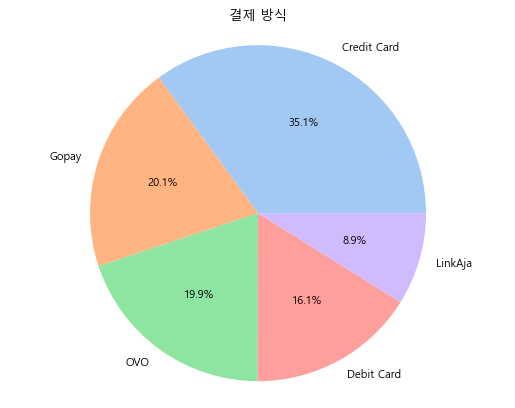

In [37]:
how_counts = df_trans_new['payment_method'].value_counts()
plt.title('결제 방식')
plt.pie(how_counts, labels=how_counts.index, autopct='%1.1f%%', colors = colors)
plt.axis('equal')
plt.show()

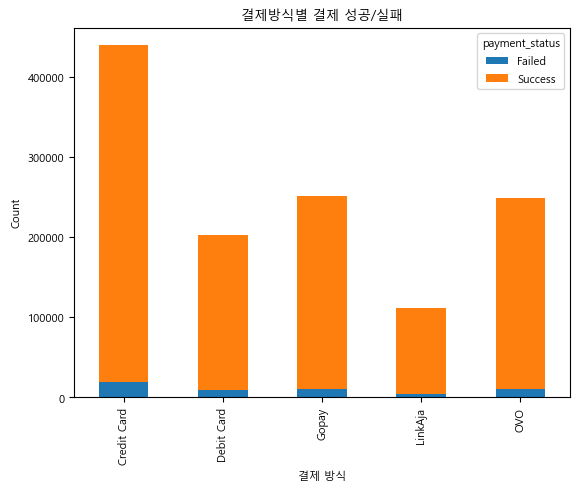

In [38]:
pay_grouped = df_trans_new.groupby(['payment_method', 'payment_status']).size().unstack()
ax = pay_grouped.plot(kind='bar', stacked = True)

total = pay_grouped.sum(axis=1)


plt.title('결제방식별 결제 성공/실패')
plt.xlabel('결제 방식')
plt.ylabel('Count')

plt.show()

In [39]:
result = pay_grouped['Success']/total

result

payment_method
Credit Card    0.957081
Debit Card     0.956322
Gopay          0.957762
LinkAja        0.956257
OVO            0.958565
dtype: float64

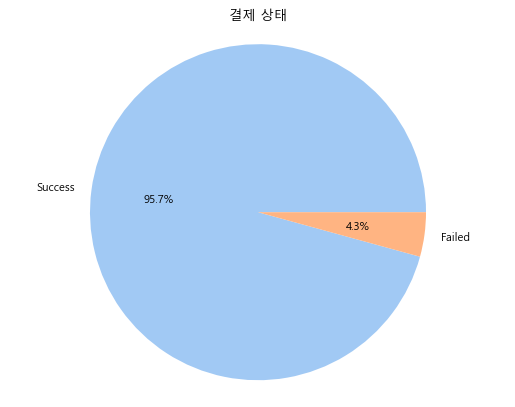

In [40]:
pay_counts = df_trans_new['payment_status'].value_counts()
plt.title('결제 상태')
plt.pie(pay_counts, labels=pay_counts.index, autopct='%1.1f%%', colors = colors)
plt.axis('equal')
plt.show()

In [41]:
df_trans_prod = df_trans_new.merge(df_product, on='product_id', how='left')

In [42]:
df_trans_user = df_trans_prod.merge(df_customer, on = 'customer_id', how = 'left')

In [43]:
df_trans_user.head(5)

,created_at,customer_id,booking_id,session_id,payment_method,payment_status,promo_amount,promo_code,shipment_fee,shipment_date_limit,...,device_id,device_version,home_location_lat,home_location_long,home_location,home_country,first_join_date,year_y,age,age_group
0,2018-07-29T15:22:01.458193Z,5868,186e2bee-0637-4710-8981-50c2d737bc42,3abaa6ce-e320-4e51-9469-d9f3fa328e86,Debit Card,Success,1415,WEEKENDSERU,10000,2018-08-03T05:07:24.812676Z,...,d1b5c84a-7718-4b7b-b5a2-cfa23d7dd836,Android 8.0.0,-6.122897,106.876500,Jakarta Raya,Indonesia,2018-07-28,2000,23,20대
1,2018-07-30T12:40:22.365620Z,4774,caadb57b-e808-4f94-9e96-8a7d4c9898db,2ee5ead1-f13e-4759-92df-7ff48475e970,Credit Card,Success,0,NaN,10000,2018-08-03T01:29:03.415705Z,...,cec6d891-746b-453e-a330-0f6d024929f6,Android 3.2.6,-3.602334,120.363824,Sulawesi Selatan,Indonesia,2018-07-28,1996,27,20대
2,2018-09-15T11:51:17.365620Z,4774,6000fffb-9c1a-4f4a-9296-bc8f6b622b50,93325fb6-eb00-4268-bb0e-6471795a0ad0,OVO,Success,0,NaN,10000,2018-09-18T08:41:49.422380Z,...,cec6d891-746b-453e-a330-0f6d024929f6,Android 3.2.6,-3.602334,120.363824,Sulawesi Selatan,Indonesia,2018-07-28,1996,27,20대
3,2018-11-01T11:23:48.365620Z,4774,f5e530a7-4350-4cd1-a3bc-525b5037bcab,bcad5a61-1b67-448d-8ff4-781d67bc56e4,Credit Card,Success,0,NaN,0,2018-11-05T17:42:27.954235Z,...,cec6d891-746b-453e-a330-0f6d024929f6,Android 3.2.6,-3.602334,120.363824,Sulawesi Selatan,Indonesia,2018-07-28,1996,27,20대
4,2018-12-18T11:20:30.365620Z,4774,0efc0594-dbbf-4f9a-b0b0-a488cfddf8a2,df1042ab-13e6-4072-b9d2-64a81974c51a,Credit Card,Success,0,NaN,0,2018-12-23T17:24:07.361785Z,...,cec6d891-746b-453e-a330-0f6d024929f6,Android 3.2.6,-3.602334,120.363824,Sulawesi Selatan,Indonesia,2018-07-28,1996,27,20대


In [44]:
# 세션도 합치면?
# 2020.08.01부터 2022.07.31까지의 데이터만 필터링
start_date = pd.to_datetime('2020-08-01', utc=True).tz_convert('UTC')
end_date = pd.to_datetime('2022-07-31', utc=True).tz_convert('UTC')
df_click_new = df_click_new[(df_click_new['event_time'] >= start_date) & (df_click_new['event_time'] <= end_date)]

df_test = df_click_new.merge(df_trans_user, on = 'session_id', how = 'left')
df_test.head(5)

,session_id,event_name,event_time,event_id,traffic_source,product_id_x,quantity_x,item_price_x,payment_status_x,search_keywords,...,device_id,device_version,home_location_lat,home_location_long,home_location,home_country,first_join_date,year_y,age,age_group
0,50761ff1-f1e9-4680-a626-c4282d70dd6f,HOMEPAGE,2020-08-02 11:58:25.425431+00:00,a97da81c-6c2d-43b6-aac4-816c66c27691,MOBILE,NaN,NaN,NaN,NaN,NaN,...,41bc4fe3-02d7-456d-8901-af058db32a7f,Android 4.1,3.869205,108.126753,Kepulauan Riau,Indonesia,2019-08-31,2007.0,16.0,10대
1,50761ff1-f1e9-4680-a626-c4282d70dd6f,ADD_TO_CART,2020-08-02 12:42:22.425431+00:00,0b870966-66c0-4b60-9093-0b2887d301f2,MOBILE,35575.0,1.0,255203.0,NaN,NaN,...,41bc4fe3-02d7-456d-8901-af058db32a7f,Android 4.1,3.869205,108.126753,Kepulauan Riau,Indonesia,2019-08-31,2007.0,16.0,10대
2,50761ff1-f1e9-4680-a626-c4282d70dd6f,ADD_PROMO,2020-08-02 13:25:34.425431+00:00,49b0bd63-1692-4dbb-87cf-2d5b05e9221e,MOBILE,NaN,NaN,NaN,NaN,NaN,...,41bc4fe3-02d7-456d-8901-af058db32a7f,Android 4.1,3.869205,108.126753,Kepulauan Riau,Indonesia,2019-08-31,2007.0,16.0,10대
3,50761ff1-f1e9-4680-a626-c4282d70dd6f,BOOKING,2020-08-02 19:19:28.425431+00:00,6ad88732-bf72-486e-bab4-d3ca592d0b32,MOBILE,NaN,NaN,NaN,Failed,NaN,...,41bc4fe3-02d7-456d-8901-af058db32a7f,Android 4.1,3.869205,108.126753,Kepulauan Riau,Indonesia,2019-08-31,2007.0,16.0,10대
4,50761ff1-f1e9-4680-a626-c4282d70dd6f,PROMO_PAGE,2020-08-02 12:42:44.425431+00:00,536122d8-6625-462c-a056-b28ba4ced34b,MOBILE,NaN,NaN,NaN,NaN,NaN,...,41bc4fe3-02d7-456d-8901-af058db32a7f,Android 4.1,3.869205,108.126753,Kepulauan Riau,Indonesia,2019-08-31,2007.0,16.0,10대


### 정리

In [45]:
# 리텐션이란, 시간이 지날수록 얼마나 많은 유저가 제품으로 다시 돌아오는지를 측정한 것입니다.


# 정해야 할 문제 
# 1. 이탈의 기준 - 방문대비 구매전환 / 단순 페이지 이탈 
# 이탈이란, 특정 사이트에 방문한 사용자가 다른페이지로 이동하지 않고 떠난 상황
# 2. 이커머스에서 적절한 이탈률 % > 20 ~ 45 % 

# 이탈이 높은 환경
# 1. 페이지가 하나로만 구성되었을 때
# 2. 페이지 로드 속드가 느린 경우
# 3. 페이지를 방문한 목적이 결과값과 다른 경우
# 4. 페이지 가독성이 좋지 못할 때
# 5. 모바일 또는 컴퓨터의 웹사이트가 모바일의 경우 컴퓨터, 컴퓨터의 경우 모바일 화면으로 랜딩될 경우.


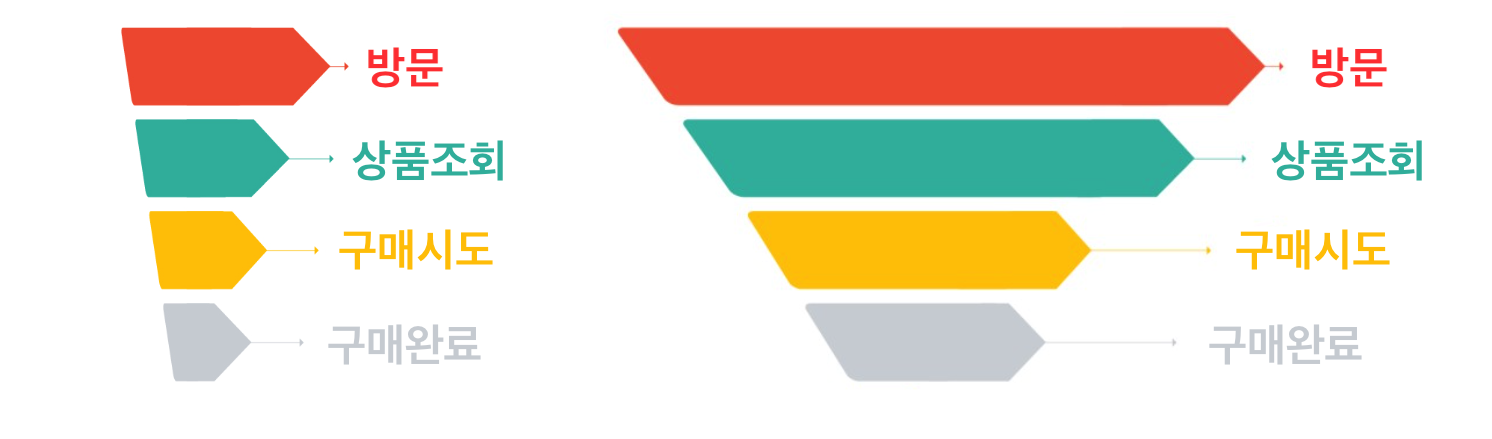

In [46]:
# 상품 조회 전환률이 낮을 경우
# 1. 상품 문제
# 2. 콘텐츠 문제(랜딩되는 페이지가 원하는 페이지가 아닌 경우)

# 구매시도 전환율이 낮은 경우
# 1. 제품 상세 페이지 문제
# 2. 가격
# 3. 리뷰

# 구매완료 전환율이 낮은 경우
# 1. 회원가입 프로세스
# 2. 주문서 페이지(결제수단 등 입력 페이지)
# 3. 혜택 문제(배송비 등의 합리적이지 않은 서비스)

### 합친 데이터를 통한 실험

In [47]:
# 세션id 에 event에 BOOKING이 없으면 session_id를 통해 합친 데이터에서 event_name 칼럼에 BOOKING이 존재하지 않는 칼럼은 유저 정보를 갖고 올 수 없음.
# 1. click_stream의 session_id가 customer의 device_id, username칼럼 등과 겹칠까? -> 겹치지 않는 것으로 확인
# 2. click_stream의 event_id가 customer의 칼럼과 device_id, username칼럼 등과 겹칠까? -> 겹치지 않는 것으로 확인

# -> 데이터를 JOIN또는 MERGE하더라도 예약하지 않고 이탈하는 session_id의 유저 정보를 갖고 올수 없음.
# 발생하는 문제
# - session_id를 통해 BOOKING이 이루어지지 않은 경우 이탈률에서 유저의 정보를 얻을 방법이 없음.

# 추가로 생각할 수 있는 방안
# 1. event_name이 SEARCH인 경우 product displaay name을 통한 유저 성별의 추측이 가능할까?
# 2. 
pd.set_option('display.max_columns', None)

df_test.head(5)

,session_id,event_name,event_time,event_id,traffic_source,product_id_x,quantity_x,item_price_x,payment_status_x,search_keywords,promo_code_x,promo_amount_x,created_at,customer_id,booking_id,payment_method,payment_status_y,promo_amount_y,promo_code_y,shipment_fee,shipment_date_limit,shipment_location_lat,shipment_location_long,total_amount,product_id_y,quantity_y,item_price_y,gender_x,masterCategory,subCategory,articleType,baseColour,season,year_x,usage,productDisplayName,first_name,last_name,username,email,gender_y,birthdate,device_type,device_id,device_version,home_location_lat,home_location_long,home_location,home_country,first_join_date,year_y,age,age_group
0,50761ff1-f1e9-4680-a626-c4282d70dd6f,HOMEPAGE,2020-08-02 11:58:25.425431+00:00,a97da81c-6c2d-43b6-aac4-816c66c27691,MOBILE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-08-02T19:19:28.425431Z,18770.0,3825896d-9f89-4028-9536-6c9cd9198a5a,Gopay,Failed,2003.0,WEEKENDSERU,10000.0,2020-08-07T06:23:12.025476Z,-8.1344,110.560506,263200.0,35575.0,1.0,255203.0,Men,Footwear,Flip Flops,Flip Flops,Green,Summer,2013.0,Casual,Gliders Men Green Esquire Flip Flops,Rina,Hartati,3593fd59-20f1-4012-9e3d-0c3413b96c36,3593fd59_20f1_4012_9e3d_0c3413b96c36@zakyfound...,F,2007-07-01,Android,41bc4fe3-02d7-456d-8901-af058db32a7f,Android 4.1,3.869205,108.126753,Kepulauan Riau,Indonesia,2019-08-31,2007.0,16.0,10대
1,50761ff1-f1e9-4680-a626-c4282d70dd6f,ADD_TO_CART,2020-08-02 12:42:22.425431+00:00,0b870966-66c0-4b60-9093-0b2887d301f2,MOBILE,35575.0,1.0,255203.0,NaN,NaN,NaN,NaN,2020-08-02T19:19:28.425431Z,18770.0,3825896d-9f89-4028-9536-6c9cd9198a5a,Gopay,Failed,2003.0,WEEKENDSERU,10000.0,2020-08-07T06:23:12.025476Z,-8.1344,110.560506,263200.0,35575.0,1.0,255203.0,Men,Footwear,Flip Flops,Flip Flops,Green,Summer,2013.0,Casual,Gliders Men Green Esquire Flip Flops,Rina,Hartati,3593fd59-20f1-4012-9e3d-0c3413b96c36,3593fd59_20f1_4012_9e3d_0c3413b96c36@zakyfound...,F,2007-07-01,Android,41bc4fe3-02d7-456d-8901-af058db32a7f,Android 4.1,3.869205,108.126753,Kepulauan Riau,Indonesia,2019-08-31,2007.0,16.0,10대
2,50761ff1-f1e9-4680-a626-c4282d70dd6f,ADD_PROMO,2020-08-02 13:25:34.425431+00:00,49b0bd63-1692-4dbb-87cf-2d5b05e9221e,MOBILE,NaN,NaN,NaN,NaN,NaN,WEEKENDSERU,2003.0,2020-08-02T19:19:28.425431Z,18770.0,3825896d-9f89-4028-9536-6c9cd9198a5a,Gopay,Failed,2003.0,WEEKENDSERU,10000.0,2020-08-07T06:23:12.025476Z,-8.1344,110.560506,263200.0,35575.0,1.0,255203.0,Men,Footwear,Flip Flops,Flip Flops,Green,Summer,2013.0,Casual,Gliders Men Green Esquire Flip Flops,Rina,Hartati,3593fd59-20f1-4012-9e3d-0c3413b96c36,3593fd59_20f1_4012_9e3d_0c3413b96c36@zakyfound...,F,2007-07-01,Android,41bc4fe3-02d7-456d-8901-af058db32a7f,Android 4.1,3.869205,108.126753,Kepulauan Riau,Indonesia,2019-08-31,2007.0,16.0,10대
3,50761ff1-f1e9-4680-a626-c4282d70dd6f,BOOKING,2020-08-02 19:19:28.425431+00:00,6ad88732-bf72-486e-bab4-d3ca592d0b32,MOBILE,NaN,NaN,NaN,Failed,NaN,NaN,NaN,2020-08-02T19:19:28.425431Z,18770.0,3825896d-9f89-4028-9536-6c9cd9198a5a,Gopay,Failed,2003.0,WEEKENDSERU,10000.0,2020-08-07T06:23:12.025476Z,-8.1344,110.560506,263200.0,35575.0,1.0,255203.0,Men,Footwear,Flip Flops,Flip Flops,Green,Summer,2013.0,Casual,Gliders Men Green Esquire Flip Flops,Rina,Hartati,3593fd59-20f1-4012-9e3d-0c3413b96c36,3593fd59_20f1_4012_9e3d_0c3413b96c36@zakyfound...,F,2007-07-01,Android,41bc4fe3-02d7-456d-8901-af058db32a7f,Android 4.1,3.869205,108.126753,Kepulauan Riau,Indonesia,2019-08-31,2007.0,16.0,10대
4,50761ff1-f1e9-4680-a626-c4282d70dd6f,PROMO_PAGE,2020-08-02 12:42:44.425431+00:00,536122d8-6625-462c-a056-b28ba4ced34b,MOBILE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-08-02T19:19:28.425431Z,18770.0,3825896d-9f89-4028-9536-6c9cd9198a5a,Gopay,Failed,2003.0,WEEKENDSERU,10000.0,2020-08-07T06:23:12.025476Z,-8.1344,110.560506,263200.0,35575.0,1.0,255203.0,Men,Footwear,Flip Flops,Flip Flops,Green,Summer,2013.0,Casual,Gliders Men Green Esquire Flip Flops,Rina,Hartati,3593fd59-20f1-4012-9e3d-0c3413b96c36,3593fd59_20f1_4012_9e3d_0c3413b96c36@zakyfound...,F,2007-07-01,Android,41bc

In [48]:
df_trans_user.head(15)

,created_at,customer_id,booking_id,session_id,payment_method,payment_status,promo_amount,promo_code,shipment_fee,shipment_date_limit,shipment_location_lat,shipment_location_long,total_amount,product_id,quantity,item_price,gender_x,masterCategory,subCategory,articleType,baseColour,season,year_x,usage,productDisplayName,first_name,last_name,username,email,gender_y,birthdate,device_type,device_id,device_version,home_location_lat,home_location_long,home_location,home_country,first_join_date,year_y,age,age_group
0,2018-07-29T15:22:01.458193Z,5868,186e2bee-0637-4710-8981-50c2d737bc42,3abaa6ce-e320-4e51-9469-d9f3fa328e86,Debit Card,Success,1415,WEEKENDSERU,10000,2018-08-03T05:07:24.812676Z,-8.227893,111.969107,199832,54728,1,191247,Men,Footwear,Shoes,Casual Shoes,Black,Summer,2012.0,Casual,Vans Men Black Shoes,Titin,Pratiwi,498c2a5e-bafe-42cc-94f9-2832ac5e1f6b,498c2a5e_bafe_42cc_94f9_2832ac5e1f6b@startupca...,F,2000-08-20,Android,d1b5c84a-7718-4b7b-b5a2-cfa23d7dd836,Android 8.0.0,-6.122897,106.876500,Jakarta Raya,Indonesia,2018-07-28,2000,23,20대
1,2018-07-30T12:40:22.365620Z,4774,caadb57b-e808-4f94-9e96-8a7d4c9898db,2ee5ead1-f13e-4759-92df-7ff48475e970,Credit Card,Success,0,NaN,10000,2018-08-03T01:29:03.415705Z,3.013470,107.802514,155526,16193,1,145526,Men,Apparel,Topwear,Sweaters,Green,Fall,2011.0,Casual,Puma Men Knitted Vest Green Sweater,Uchita,Hassanah,5009ab96-84ff-44ef-98b0-c1b492658c29,5009ab96_84ff_44ef_98b0_c1b492658c29@startupca...,F,1996-03-15,Android,cec6d891-746b-453e-a330-0f6d024929f6,Android 3.2.6,-3.602334,120.363824,Sulawesi Selatan,Indonesia,2018-07-28,1996,27,20대
2,2018-09-15T11:51:17.365620Z,4774,6000fffb-9c1a-4f4a-9296-bc8f6b622b50,93325fb6-eb00-4268-bb0e-6471795a0ad0,OVO,Success,0,NaN,10000,2018-09-18T08:41:49.422380Z,-2.579428,115.743885,550696,53686,4,135174,Women,Accessories,Bags,Handbags,Purple,Summer,2012.0,Casual,Kiara Women Purple & Yellow Handbag,Uchita,Hassanah,5009ab96-84ff-44ef-98b0-c1b492658c29,5009ab96_84ff_44ef_98b0_c1b492658c29@startupca...,F,1996-03-15,Android,cec6d891-746b-453e-a330-0f6d024929f6,Android 3.2.6,-3.602334,120.363824,Sulawesi Selatan,Indonesia,2018-07-28,1996,27,20대
3,2018-11-01T11:23:48.365620Z,4774,f5e530a7-4350-4cd1-a3bc-525b5037bcab,bcad5a61-1b67-448d-8ff4-781d67bc56e4,Credit Card,Success,0,NaN,0,2018-11-05T17:42:27.954235Z,-3.602334,120.363824,271012,20228,1,271012,Women,Apparel,Topwear,Sweaters,Red,Fall,2011.0,Casual,Wrangler Women Cable Red Sweater,Uchita,Hassanah,5009ab96-84ff-44ef-98b0-c1b492658c29,5009ab96_84ff_44ef_98b0_c1b492658c29@startupca...,F,1996-03-15,Android,cec6d891-746b-453e-a330-0f6d024929f6,Android 3.2.6,-3.602334,120.363824,Sulawesi Selatan,Indonesia,2018-07-28,1996,27,20대
4,2018-12-18T11:20:30.365620Z,4774,0efc0594-dbbf-4f9a-b0b0-a488cfddf8a2,df1042ab-13e6-4072-b9d2-64a81974c51a,Credit Card,Success,0,NaN,0,2018-12-23T17:24:07.361785Z,-3.602334,120.363824,198753,55220,1,198753,Women,Personal Care,Lips,Lip Liner,Brown,Spring,2017.0,Casual,Lakme Absolute Forever Silk Chestnut Lip Liner 03,Uchita,Hassanah,5009ab96-84ff-44ef-98b0-c1b492658c29,5009ab96_84ff_44ef_98b0_c1b492658c29@startupca...,F,1996-03-15,Android,cec6d891-746b-453e-a330-0f6d024929f6,Android 3.2.6,-3.602334,120.363824,Sulawesi Selatan,Indonesia,2018-07-28,1996,27,20대
5,2019-02-03T11:25:55.365620Z,4774,1ed58c46-67fb-4386-924b-983c74ccb4d7,7fa0b583-6d30-40bc-8b61-0f70f5bef30f,Debit Card,Success,6369,WEEKENDMANTAP,5000,2019-02-07T10:41:59.997463Z,-3.602334,120.363824,181865,59620,1,183234,Women,Apparel,Saree,Sarees,Green,Summer,2012.0,Ethnic,FNF Green & Black Wedding Collection Sari,Uchita,Hassanah,5009ab96-84ff-44ef-98b0-c1b492658c29,5009ab96_84ff_44ef_98b0_c1b492658c29@startupca...,F,1996-03-15,Android,cec6d891-746b-453e-a330-0f6d024929f6,Android 3.2.6,-3.602334,120.363824,Sulawesi Selatan,Indonesia,2018-07-28,1996,27,20대
6,2019-03-22T11:53:02.365620Z,4774,c0ced313-e6b1-4a2a-b21f-347eccda5f96,e140f1f1-6da1-42b3-b2d1-56ac6fc72d4a,Credit Card,Success,0,NaN,10000,2019-03-27T14:40:13.181562Z,-7.712608,1

In [49]:
df_trans_user['created_at'] = pd.to_datetime(df_trans_user['created_at'])

In [50]:
df_trans

,created_at,customer_id,booking_id,session_id,product_metadata,payment_method,payment_status,promo_amount,promo_code,shipment_fee,shipment_date_limit,shipment_location_lat,shipment_location_long,total_amount
0,2018-07-29T15:22:01.458193Z,5868,186e2bee-0637-4710-8981-50c2d737bc42,3abaa6ce-e320-4e51-9469-d9f3fa328e86,"[{'product_id': 54728, 'quantity': 1, 'item_pr...",Debit Card,Success,1415,WEEKENDSERU,10000,2018-08-03T05:07:24.812676Z,-8.227893,111.969107,199832
1,2018-07-30T12:40:22.365620Z,4774,caadb57b-e808-4f94-9e96-8a7d4c9898db,2ee5ead1-f13e-4759-92df-7ff48475e970,"[{'product_id': 16193, 'quantity': 1, 'item_pr...",Credit Card,Success,0,NaN,10000,2018-08-03T01:29:03.415705Z,3.013470,107.802514,155526
2,2018-09-15T11:51:17.365620Z,4774,6000fffb-9c1a-4f4a-9296-bc8f6b622b50,93325fb6-eb00-4268-bb0e-6471795a0ad0,"[{'product_id': 53686, 'quantity': 4, 'item_pr...",OVO,Success,0,NaN,10000,2018-09-18T08:41:49.422380Z,-2.579428,115.743885,550696
3,2018-11-01T11:23:48.365620Z,4774,f5e530a7-4350-4cd1-a3bc-525b5037bcab,bcad5a61-1b67-448d-8ff4-781d67bc56e4,"[{'product_id': 20228, 'quantity': 1, 'item_pr...",Credit Card,Success,0,NaN,0,2018-11-05T17:42:27.954235Z,-3.602334,120.363824,271012
4,2018-12-18T11:20:30.365620Z,4774,0efc0594-dbbf-4f9a-b0b0-a488cfddf8a2,df1042ab-13e6-4072-b9d2-64a81974c51a,"[{'product_id': 55220, 'quantity': 1, 'item_pr...",Credit Card,Success,0,NaN,0,2018-12-23T17:24:07.361785Z,-3.602334,120.363824,198753
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
852579,2021-09-21T22:10:05.074873Z,25121,66f02fa4-c62e-497a-8b6e-be239009b50a,484eecde-9f4a-42de-a8df-7ce6668101f4,"[{'product_id': 30642, 'quantity': 2, 'item_pr...",Debit Card,Failed,0,NaN,0,2021-09-27T00:43:40.992167Z,-6.869535,111.077145,226820
852580,2021-12-09T07:35:18.222046Z,34829,ccde6b83-ee42-4cce-b2cd-976574886eac,954e1211-4d45-4d0b-ba84-53e80119592c,"[{'product_id': 19394, 'quantity': 1, 'item_pr...",OVO,Success,5010,AZ2022,10000,2021-12-12T07:52:44.803822Z,-8.677264,115.176947,359203
852581,2021-12-11T01:20:36.944593Z,99645,5bcd3434-1dc6-44bb-ae63-fd19714cbd6c,e6e6c108-abd0-49a2-b0a5-691117f9cfe1,"[{'product_id': 13079, 'quantity': 4, 'item_pr...",Credit Card,Success,2181,WEEKENDSERU,5000,2021-12-12T13:28:22.848703Z,-6.185498,106.831093,1158159
852582,2019-12-18T11:01:09.623382Z,87319,af7f291a-b01b-4bfd-89a9-237b16368b15,bb6e5426-a3f3-426a-b99d-79173eaa234b,"[{'product_id': 11312, 'quantity': 1, 'item_pr...",Credit Card,Success,4503,AZ2022,0,2019-12-23T22:56:46.831720Z,-7.155977,110.891858,184143


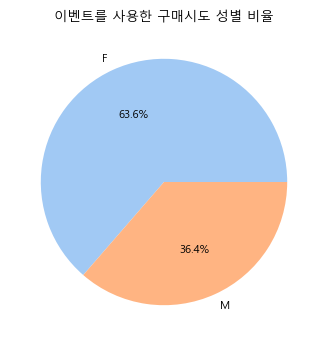

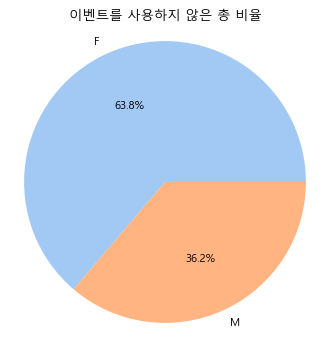

In [51]:
# 가설 1. 여성 유저가 남성 유저보다 이벤트를 활용을 많이 할 것이다.

# promo_code 칼럼이 NaN값이 아닌 행을 선택
df_filtered = df_trans_user[df_trans_user['promo_code'].notnull()]

# gender_y 칼럼을 기준으로 groupby하여 각 성별의 비율 계산
gender_counts = df_filtered.groupby('gender_y')['promo_code'].count()
gender_total = gender_counts.sum()
gender_ratios = gender_counts / gender_total

plt.gcf().set_size_inches(4, 4)

# 시각화
plt.pie(gender_ratios, labels=gender_ratios.index, autopct='%1.1f%%', colors = colors)
plt.title('이벤트를 사용한 구매시도 성별 비율')
plt.show()

gender_counts = df_trans_user['gender_y'].value_counts()
gender_total = gender_counts.sum()
gender_ratios = gender_counts / gender_total
plt.gcf().set_size_inches(4, 4)

plt.title("이벤트를 사용하지 않은 총 비율")
plt.pie(gender_ratios, labels=gender_ratios.index, autopct='%1.1f%%', colors = colors)
plt.axis('equal')
plt.show()


In [52]:
# MOBILE과 WEB에서 웹사이트의 퀄리티가 구매에 영향을 줄 것이다.
df_click_new['traffic_source'].value_counts(normalize=True)

traffic_source
MOBILE    0.899992
WEB       0.100008
Name: proportion, dtype: float64

In [53]:
check_traffic_source = df_click_new.groupby('session_id').apply(lambda x: x.sort_values('event_time').iloc[-1]['traffic_source'] if x.sort_values('event_time').iloc[-1]['event_name']=='BOOKING' else None)

In [54]:
check_traffic_source.value_counts(normalize=True)

MOBILE    0.899974
WEB       0.100026
Name: proportion, dtype: float64

### 한 세션에서 여러개의 item을 구매한 경우

- 거래 실패한경우 drop
- 최근 2년간의 데이터만 사용 (계절의 수가 다를 수 있음)

In [55]:
df_check = df_trans_user.drop(['product_id', 'quantity', 'item_price', 'gender_x', 'masterCategory', 'subCategory', 'articleType', 'baseColour', 'season', 'year_x', 'usage', 'productDisplayName'], axis = 1)
print(df_check.shape)
df_check.drop_duplicates(inplace=True)
print(df_check.shape)

(1254585, 30)
(852584, 30)


In [56]:
df_check['payment_status'].value_counts(normalize = True)

payment_status
Success    0.957048
Failed     0.042952
Name: proportion, dtype: float64

In [57]:
# 2020.08.01부터 2022.07.31까지의 데이터만 필터링
start_date = pd.to_datetime('2020-08-01', utc=True).tz_convert('UTC')
end_date = pd.to_datetime('2022-07-31', utc=True).tz_convert('UTC')
df_check = df_check[(df_check['created_at'] >= start_date) & (df_check['created_at'] <= end_date)]

In [58]:
print(df_check.shape)

(531234, 30)


In [59]:
df_check_suc = df_check[df_check['payment_status'] == 'Success']
print(df_check_suc.shape)

(508264, 30)


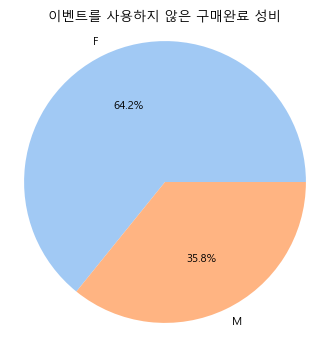

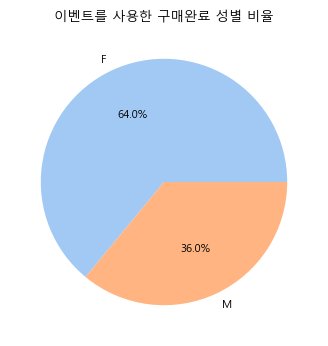

In [60]:
# 가설 1. 여성 유저가 남성 유저보다 이벤트를 활용을 많이 할 것이다. 

# 재실험

gender_counts = df_check_suc['gender_y'].value_counts()
gender_total = gender_counts.sum()
gender_ratios = gender_counts / gender_total
plt.gcf().set_size_inches(4, 4)

plt.title("이벤트를 사용하지 않은 구매완료 성비")
plt.pie(gender_ratios, labels=gender_ratios.index, autopct='%1.1f%%', colors = colors)
plt.axis('equal')
plt.show()

# promo_code 칼럼이 NaN값이 아닌 행을 선택
df_filtered = df_check_suc[df_check_suc['promo_code'].notnull()]

# gender_y 칼럼을 기준으로 groupby하여 각 성별의 비율 계산
gender_counts = df_filtered.groupby('gender_y')['promo_code'].count()
gender_total = gender_counts.sum()
gender_ratios = gender_counts / gender_total

plt.gcf().set_size_inches(4, 4)

# 시각화
plt.pie(gender_ratios, labels=gender_ratios.index, autopct='%1.1f%%', colors = colors)
plt.title('이벤트를 사용한 구매완료 성별 비율')
plt.show()



In [61]:
df_check_suc.sample(5)

,created_at,customer_id,booking_id,session_id,payment_method,payment_status,promo_amount,promo_code,shipment_fee,shipment_date_limit,shipment_location_lat,shipment_location_long,total_amount,first_name,last_name,username,email,gender_y,birthdate,device_type,device_id,device_version,home_location_lat,home_location_long,home_location,home_country,first_join_date,year_y,age,age_group
788791,2022-03-12 20:01:26.840573+00:00,79332,f262ac84-8f36-4c1a-94cc-c34b753f2d11,3a263e28-bbaf-49b5-8990-c6d198f19a9d,LinkAja,Success,0,NaN,0,2022-03-13T22:59:55.035039Z,-7.513136,112.038306,621347,Hamima,Usada,f0abde4f-1b5e-4113-ba3a-83f24428b5f5,f0abde4f_1b5e_4113_ba3a_83f24428b5f5@startupca...,F,1995-03-12,Android,36d705b7-2523-4538-a212-8ae96c2cb51e,Android 9,-7.513136,112.038306,Jawa Timur,Indonesia,2021-04-10,1995,28,20대
1004804,2020-08-09 13:43:34.381399+00:00,80617,68cd251f-47c8-4bae-9b37-7d8fdf215b89,aaafed9c-8e8b-4c43-ac3a-a8fadda507c3,Debit Card,Success,0,NaN,10000,2020-08-12T07:15:35.507350Z,-3.260721,116.135919,232032,Ikin,Gunarto,d44c03f0-9422-49a5-aef8-266ce65d313e,d44c03f0_9422_49a5_aef8_266ce65d313e@startupca...,M,2001-08-19,iOS,805ad8c1-649e-4f27-877a-75b58b0fc111,iPhone; CPU iPhone OS 14_2 like Mac OS X,-7.943855,114.167395,Jawa Timur,Indonesia,2020-06-15,2001,22,20대
447924,2021-07-02 08:39:38.465272+00:00,78778,bd94ed58-3457-4361-a296-a5f267168f0a,1c6015b9-23e1-4c4c-adb7-c91088f17e4a,Debit Card,Success,0,NaN,5000,2021-07-03T19:54:08.691010Z,-1.330225,112.962082,81775,Zelaya,Prastuti,0928ab29-ebb4-49a2-9856-4982c3505bce,0928ab29_ebb4_49a2_9856_4982c3505bce@zakyfound...,F,2005-06-21,Android,1ac8189f-968b-43d4-9690-013466b3b282,Android 9,-1.330225,112.962082,Kalimantan Tengah,Indonesia,2019-03-09,2005,18,10대
540367,2022-02-23 18:17:13.206723+00:00,72896,c4e9a56c-5680-4f76-8f22-f0f9f3a55c3a,61995b0f-02ea-48a3-aaea-b5b9b7568e88,OVO,Success,0,NaN,10000,2022-02-26T11:03:41.333317Z,-5.679668,138.062787,1427896,Prima,Latupono,37fa6f5b-9e44-45b4-9f39-709e00628fe0,37fa6f5b_9e44_45b4_9f39_709e00628fe0@zakyfound...,M,1995-09-14,Android,a7ecb52f-ba94-48b3-a9b3-7a6df84ad8f5,Android 4.3.1,0.224966,109.121262,Kalimantan Barat,Indonesia,2019-08-25,1995,28,20대
687406,2020-11-05 06:40:43.864817+00:00,79866,18f05f37-37eb-4fc4-80e8-aa34f8a775ed,281f3af0-ade3-4e8f-bc36-63ea9a26930c,Gopay,Success,0,NaN,0,2020-11-07T10:32:58.526601Z,-6.189250,107.377419,127736,Faizah,Nuraini,a7446ccd-7da4-4943-a8fd-53f695297f45,a7446ccd_7da4_4943_a8fd_53f695297f45@startupca...,F,2000-02-15,iOS,07b213ea-da04-4ec0-950f-46ba7692b11b,iPhone; CPU iPhone OS 4_2_1 like Mac OS X,-6.189250,107.377419,Jawa Barat,Indonesia,2020-09-26,2000,23,20대


In [62]:
# 리텐션율 (구매완료 기준 계산)
value_counts = df_check_suc['customer_id'].value_counts()

# 같은 값을 갖는 행이 여러 개인 경우의 개수 출력
print('여러번 구매한 사람', value_counts[value_counts > 1].count(), '명')

# 같은 값을 갖는 행이 하나인 경우의 개수 출력
print('한번 구매한 사람', value_counts[value_counts == 1].count(), '명')

print('총 인원수', value_counts.count(), '명')

re_ratio = value_counts[value_counts > 1].count() / value_counts.count()

print('리텐션율(구매완료한 사람 기준)', round(re_ratio,2))

여러번 구매한 사람 34802 명
한번 구매한 사람 9000 명
총 인원수 43802 명
리텐션율(구매완료한 사람 기준) 0.79


In [71]:
# df_test의 경우 최근 2년의 data만 가져옴 

# 구매완료 전환율 -> 구매완료 세션 수 / 총 session_id 수 

num_suc = df_test[df_test['payment_status_x'] == 'Success']['session_id'].value_counts().count()
total_session = df_test['session_id'].value_counts().count()

print('구매 완료 세션 수', num_suc)
print('세션 수', total_session)

print('구매완료 전환율', round(num_suc/total_session,2))

구매 완료 세션 수 508262
세션 수 550397
구매완료 전환율 0.92
